In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import FloatSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.optimize import curve_fit

from mpl_toolkits.mplot3d import Axes3D
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13

In [2]:
!head *.norm

# Athena multicolumn data file -- Athena version 0.8.061
# This file contains normalized mu(E) from:
# listi_cell_wall_epi.xmu (column 2)
# listi_cell_wall_mezo.xmu (column 3)
# CdSO4_GSH.xmu (column 4)
# CdSO4_pectin_tr.xmu (column 5)
#------------------------
#  energy  listi_cell_wall_epi_xmu listi_cell_wall_mezo_xmu  CdSO4_GSH_xmu  CdSO4_pectin_tr_xmu
  3520.2720       0.15053182E-02   0.11627657E-02  -0.85828717E-03   0.33159921E-02
  3520.5660       0.64909787E-03   0.88397631E-03   0.62566149E-03  -0.47226292E-03


In [3]:
fajli = !ls *.norm
prebrano = np.loadtxt(fajli[0])
data = pd.DataFrame(data=prebrano, columns=["E", "v1", #vzorec 1, krovna plast
                                            "v2", #vzorec 2, sredica listov
                                            "s1", #standard Cd-S
                                            "s2" # standar Cd-O
                                            ])
data.tail()


,E,v1,v2,s1,s2
195,3578.731,0.945549,0.943797,0.928856,0.935237
196,3579.036,0.948886,0.932838,0.935213,0.934686
197,3579.343,0.947313,0.927981,0.928297,0.932642
198,3579.648,0.950789,0.935820,0.926735,0.932916
199,3579.955,0.934221,0.954980,0.916258,0.933789


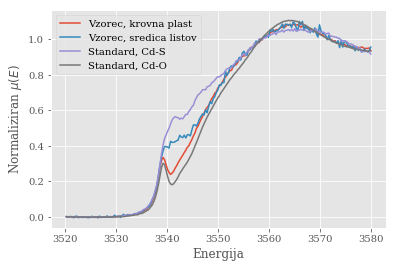

In [5]:
plt.plot(data.E, data.v1, label="Vzorec, krovna plast")
plt.plot(data.E, data.v2  ,label="Vzorec, sredica listov")
plt.plot(data.E, data.s1  ,label="Standard, Cd-S")
plt.plot(data.E, data.s2  ,label="Standard, Cd-O")

plt.legend()
plt.xlabel("Energija")
plt.ylabel(r"Normaliziran $\mu(E)$")
plt.savefig("3-1-plot.pdf")
plt.savefig("3-1-plot.jpg")
plt.show()

In [58]:
s1_sigma = np.sum((data.s1.rolling(5).mean().shift(-2)[3:-3]-data.s1[3:-3])**2)/len(data.s1-5)
s2_sigma = np.sum((data.s2.rolling(5).mean().shift(-2)[3:-3]-data.s2[3:-3])**2)/len(data.s2-5)
v1_sigma = np.sum((data.v1.rolling(5).mean().shift(-2)[3:-3]-data.v1[3:-3])**2)/len(data.v1-5)
v2_sigma = np.sum((data.v2.rolling(5).mean().shift(-2)[3:-3]-data.v2[3:-3])**2)/len(data.v2-5)
(s1_sigma, s2_sigma, v1_sigma, v2_sigma)

(1.8179918051380684e-05,
 1.2514135757575099e-05,
 1.8237390670944052e-05,
 0.00010472451022223754)

Napravim najprvo za v1:

In [44]:
A = np.array([data.s1/s1_sigma**0.5, data.s2/s2_sigma**0.5]).T
b1 = np.array([data.v1/v1_sigma**0.5])
b2 = np.array([data.v2/v2_sigma**0.5])
from numpy.linalg import svd
U, w, Vt = svd(A)


In [57]:
a1 = np.zeros(2)
a2 = np.zeros(2)
V = Vt.T

for i in range(2):
    a1 = a1 + (np.dot(U.T[i], b1.reshape(-1)))/np.diag(w)[i,i] * Vt[i]
    a2 = a2 + (np.dot(U.T[i], b2.reshape(-1)))/np.diag(w)[i,i] * Vt[i]
a1, a2

(array([0.27227471, 0.60460836]), array([0.2304239 , 0.15373835]))

In [42]:
sigme1 = np.array([0,0])
sigme2 = np.array([0,0])
for j in range(2):
    sigme1[j] = 0
    for i in range(2):
        sigme1[j] = sigme1[j] + (V[j,i]/w[i])**2
        sigme2[j] = sigme2[j] + (V[j,i]/w[i])**2


In [43]:
sigme1, sigme2

(array([0., 0.]), array([0., 0.]))

In [49]:
(np.sum((V[:,0]/w)**2))**0.5,(np.sum((V[:,1]/w)**2))**0.5


(0.0027733248608547544, 0.002404369086119501)

In [41]:
len(data)

200

In [51]:
data.E.rolling(5).mean(), data.E

0            NaN
1            NaN
2            NaN
3            NaN
4      3520.8604
5      3521.1544
6      3521.4486
7      3521.7428
8      3522.0370
9      3522.3304
10     3522.6246
11     3522.9184
12     3523.2128
13     3523.5072
14     3523.8016
15     3524.0962
16     3524.3910
17     3524.6852
18     3524.9796
19     3525.2746
20     3525.5696
21     3525.8650
22     3526.1610
23     3526.4566
24     3526.7522
25     3527.0474
26     3527.3416
27     3527.6364
28     3527.9318
29     3528.2274
         ...    
170    3570.4982
171    3570.8018
172    3571.1056
173    3571.4096
174    3571.7134
175    3572.0178
176    3572.3224
177    3572.6276
178    3572.9322
179    3573.2366
180    3573.5414
181    3573.8458
182    3574.1492
183    3574.4548
184    3574.7608
185    3575.0654
186    3575.3718
187    3575.6776
188    3575.9820
189    3576.2864
190    3576.5920
191    3576.8964
192    3577.2020
193    3577.5082
194    3577.8140
195    3578.1196
196    3578.4254
197    3578.73

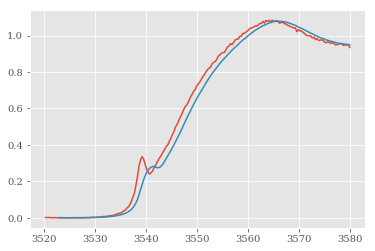

In [56]:
@interact(delay=FloatSlider(min=-10, max=10, value=0, step=1))
def _(delay):
    plt.plot(data.E, data.v1, label="Vzorec, krovna plast")
    plt.plot(data.E, data.v1.rolling(10).mean().shift(np.int(delay))  ,label="Delay: {}".format(np.int(delay)))
    plt.show()